<a href="https://colab.research.google.com/github/cloudmrhub/tess-tools/blob/main/tess_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!! pip install git+https://github.com/cloudmrhub/tess-tools

['Collecting git+https://github.com/cloudmrhub/tess-tools',
 '  Cloning https://github.com/cloudmrhub/tess-tools to /tmp/pip-req-build-dj_oqn1h',
 '  Running command git clone --filter=blob:none --quiet https://github.com/cloudmrhub/tess-tools /tmp/pip-req-build-dj_oqn1h',
 '  Resolved https://github.com/cloudmrhub/tess-tools to commit 02bec7788b8c78abe5819899a8f78a14871742d4',
 '  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone',
 'Collecting pynico_eros_montin@ git+https://github.com/erosmontin/pynico.git (from tess==2.0.0.8)',
 '  Cloning https://github.com/erosmontin/pynico.git to /tmp/pip-install-u6cziqk3/pynico-eros-montin_4fd7ffdec4a348a1bacc595001e68d33',
 '  Running command git clone --filter=blob:none --quiet https://github.com/erosmontin/pynico.git /tmp/pip-install-u6cziqk3/pynico-eros-montin_4fd7ffdec4a348a1bacc595001e68d33',
 ' 

In [10]:
# download the data
DIR='./'
import urllib.request
for a in  ["C","K","Q","R","SAR","TInitial","W"]:
  THATFILE=f"https://tess-testdata.s3.us-east-1.amazonaws.com/hugo2mm/{a}.nii.gz"
  urllib.request.urlretrieve(THATFILE, f"{a}.nii.gz")





Using executable /usr/local/lib/python3.12/dist-packages/tess/bin/cpptemperature
b'Nx = 310\nNy = 178\nNz = 162\ndx = 0.002000\ndy = 0.002000\ndz = 0.002000\ndt = 0.200000\nzmin = 0\nzmax = 162\nmaxsavetime = -1\nDeltaSave = 10\nheatingtime = 100.000000\neps = 1.000000e-09\nPre PosPre LoadCblood = 1057.000000\nRblood = 3600.000000\nTblood = 310.000000\nWair = 0.000000\nRair = 1.300000\nCair = 1006.000000\nKair = 0.026000\nQair = 1006.000000\nTair = 296.000000\nsizeT = 8939160\nReading Told\nReading SAR\nReading W\nReading R\nReading Q\nReading C\nReading K\nPosxfile = uniform\nPosyfile = uniform\nPoszfile = uniform\nTbloodfile = constant\nscaleSARfile = constant\nhconvec = 0.000000\nstep= 1, errE= 1.001888e-04, val= 296.000000, Tblood = 310.000000 \nstep= 2, errE= 1.001534e-04, val= 296.000000, Tblood = 310.000000 \nstep= 3, errE= 1.001266e-04, val= 296.000000, Tblood = 310.000000 \nstep= 4, errE= 1.001001e-04, val= 296.000000, Tblood = 310.000000 \nstep= 5, errE= 1.000738e-04, val= 29

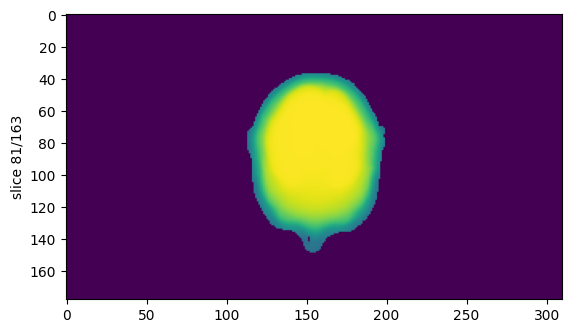

'FinalTemperature.nii.gz'

In [3]:
import tess.tess as t
A=t.Tess()
import os

A.setHeatingTime(10)
A.setBloodPerfusionMap(os.path.join(DIR,'W.nii.gz'))
A.setMaterialDensityMap(os.path.join(DIR,'R.nii.gz'))
A.setSpace(os.path.join(DIR,'R.nii.gz'))

A.setHeatCapacityMap(os.path.join(DIR,'C.nii.gz'))
A.setSARMap(os.path.join(DIR,'SAR.nii.gz'))
A.setThermalConductivityMap(os.path.join(DIR,'K.nii.gz'))
A.setMetabolismHeatMap(os.path.join(DIR,'Q.nii.gz'))
A.setTOldMap(os.path.join(DIR,'TInitial.nii.gz'))
# set blood parameters
A.setBloodParameters(d={'capacity':1057,'density':3600,'temperature':310})
# set air parameters
A.setAirParameters(d={'capacity':1006,'density':1.3,'temperature':296,'metabolism':1006,'conductivity':0.026,'perfusion':0})

O=A.getOutput('/tmp/a.nii')
A.log.printWhatHappened()
print(A.params)
O.viewAxial()
O.writeImageAs("FinalTemperature.nii.gz")

In [6]:
!wget https://cmrpeople.s3.us-east-1.amazonaws.com/powerlevels.txt


--2025-12-01 20:54:50--  https://cmrpeople.s3.us-east-1.amazonaws.com/powerlevels.txt
Resolving cmrpeople.s3.us-east-1.amazonaws.com (cmrpeople.s3.us-east-1.amazonaws.com)... 52.217.100.240, 52.217.94.224, 16.15.182.45, ...
Connecting to cmrpeople.s3.us-east-1.amazonaws.com (cmrpeople.s3.us-east-1.amazonaws.com)|52.217.100.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26 [text/plain]
Saving to: ‘powerlevels.txt’

powerlevels.txt     100%[===================>]      26  --.-KB/s    in 0s      

2025-12-01 20:54:51 (285 KB/s) - ‘powerlevels.txt’ saved [26/26]



Using executable /usr/local/lib/python3.12/dist-packages/tess/bin/cpptemperature
b'Nx = 310\nNy = 178\nNz = 162\ndx = 0.002000\ndy = 0.002000\ndz = 0.002000\ndt = 0.200000\nzmin = 0\nzmax = 162\nmaxsavetime = -1\nDeltaSave = 10\nheatingtime = 10.000000\neps = 1.000000e-09\nPre PosPre LoadCblood = 1057.000000\nRblood = 3600.000000\nTblood = 310.000000\nWair = 0.000000\nRair = 1.300000\nCair = 1006.000000\nKair = 0.026000\nQair = 1006.000000\nTair = 296.000000\nsizeT = 8939160\nReading Told\nReading SAR\nReading W\nReading R\nReading Q\nReading C\nReading K\nPosxfile = uniform\nPosyfile = uniform\nPoszfile = uniform\nTbloodfile = constant\nscaleSARfile = powerlevels.txt\nFirst val 1.000000e+00\nhconvec = 0.000000\nstep= 1, errE= 1.001888e-04, val= 296.000000, Tblood = 310.000000 \nstep= 2, errE= 1.001534e-04, val= 296.000000, Tblood = 310.000000 \nstep= 3, errE= 1.001266e-04, val= 296.000000, Tblood = 310.000000 \nstep= 4, errE= 1.001001e-04, val= 296.000000, Tblood = 310.000000 \nstep= 

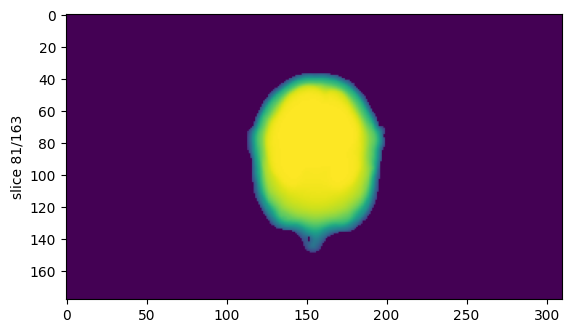

'FinalTemperaturePL.nii.gz'

In [13]:
import tess.tess as t
A=t.Tess()
import os

A.setHeatingTime(10)
A.setBloodPerfusionMap(os.path.join(DIR,'W.nii.gz'))
A.setMaterialDensityMap(os.path.join(DIR,'R.nii.gz'))
A.setSpace(os.path.join(DIR,'R.nii.gz'))

A.setHeatCapacityMap(os.path.join(DIR,'C.nii.gz'))
A.setSARMap(os.path.join(DIR,'SAR.nii.gz'))
A.setThermalConductivityMap(os.path.join(DIR,'K.nii.gz'))
A.setMetabolismHeatMap(os.path.join(DIR,'Q.nii.gz'))
A.setTOldMap(os.path.join(DIR,'TInitial.nii.gz'))
# set blood parameters
A.setBloodParameters(d={'capacity':1057,'density':3600,'temperature':310})
# set air parameters
A.setAirParameters(d={'capacity':1006,'density':1.3,'temperature':296,'metabolism':1006,'conductivity':0.026,'perfusion':0})
A.setParam("scaleSARfile",'powerlevels.txt')
O=A.getOutput('/tmp/a.nii')
A.log.printWhatHappened()
print(A.params)
O.viewAxial()
O.writeImageAs("FinalTemperaturePL.nii.gz")

In [14]:
import nibabel as nib

img1 = nib.load('FinalTemperature.nii.gz')
img2 = nib.load('FinalTemperaturePL.nii.gz')

print("Loaded FinalTemperature.nii.gz into img1")
print("Loaded FinalTemperaturePL.nii.gz into img2")

Loaded FinalTemperature.nii.gz into img1
Loaded FinalTemperaturePL.nii.gz into img2


## Define Interactive Viewer

### Subtask:
Create a Python function that uses `matplotlib` to display axial slices of both NIfTI images side-by-side, and set up an event handler for mouse clicks.


**Reasoning**:
I will define the `interactive_viewer` function, which will display axial slices of two NIfTI images side-by-side using `matplotlib` and set up a mouse click event handler.



In [15]:
import matplotlib.pyplot as plt
import numpy as np

def interactive_viewer(img1, img2):
    data1 = img1.get_fdata()
    data2 = img2.get_fdata()

    # Determine a common axial slice (middle slice along z-axis)
    z_slice = data1.shape[2] // 2

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(data1[:, :, z_slice].T, cmap='gray', origin='lower')
    axes[0].set_title(f'FinalTemperature.nii.gz (Slice {z_slice})')
    axes[0].set_xlabel('X-axis')
    axes[0].set_ylabel('Y-axis')

    axes[1].imshow(data2[:, :, z_slice].T, cmap='gray', origin='lower')
    axes[1].set_title(f'FinalTemperaturePL.nii.gz (Slice {z_slice})')
    axes[1].set_xlabel('X-axis')
    axes[1].set_ylabel('Y-axis')

    plt.tight_layout()

    # Set up the event handler for mouse clicks
    def on_click(event):
        if event.inaxes:
            print(f"Clicked on: {event.inaxes.get_title()}, Coordinates: ({event.xdata:.2f}, {event.ydata:.2f})")

    fig.canvas.mpl_connect('button_press_event', on_click)
    plt.show()

print("interactive_viewer function defined.")

interactive_viewer function defined.


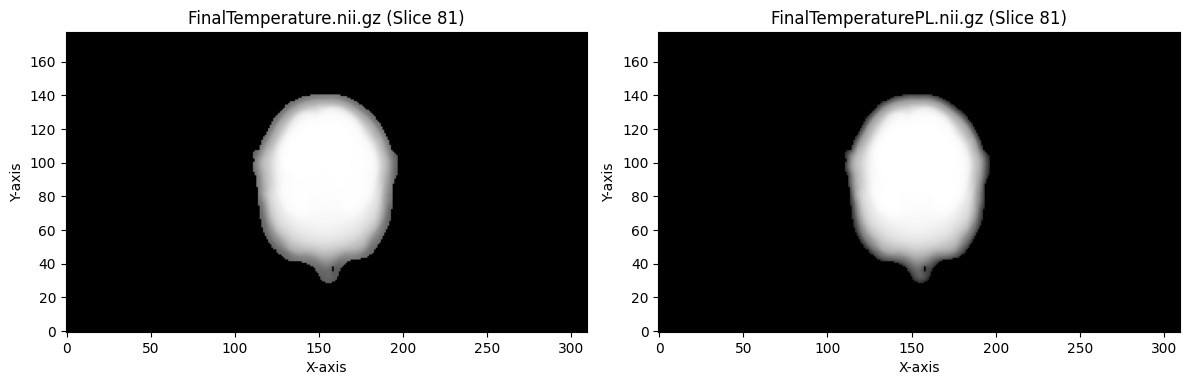

In [16]:
interactive_viewer(img1, img2)

## Implement Click Callback Function

### Subtask:
Within the interactive viewer, define a callback function that will be triggered on mouse clicks. This function should convert the click coordinates to image voxel coordinates, extract the voxel values from both images at that point, calculate the difference, and print or display this information to the user.


**Reasoning**:
I need to update the `interactive_viewer` function to enhance the `on_click` callback. The updated callback will convert mouse click coordinates to image voxel coordinates, perform boundary checks, extract voxel values from both images at the clicked point, calculate their difference, and print this information to the console.



In [17]:
import matplotlib.pyplot as plt
import numpy as np

def interactive_viewer(img1, img2):
    data1 = img1.get_fdata()
    data2 = img2.get_fdata()

    # Determine a common axial slice (middle slice along z-axis)
    z_slice = data1.shape[2] // 2

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(data1[:, :, z_slice].T, cmap='gray', origin='lower')
    axes[0].set_title(f'FinalTemperature.nii.gz (Slice {z_slice})')
    axes[0].set_xlabel('X-axis')
    axes[0].set_ylabel('Y-axis')

    axes[1].imshow(data2[:, :, z_slice].T, cmap='gray', origin='lower')
    axes[1].set_title(f'FinalTemperaturePL.nii.gz (Slice {z_slice})')
    axes[1].set_xlabel('X-axis')
    axes[1].set_ylabel('Y-axis')

    plt.tight_layout()

    # Set up the event handler for mouse clicks
    def on_click(event):
        if event.inaxes:
            # Convert click coordinates to integer voxel coordinates
            # imshow with .T transposes the axes, so event.ydata corresponds to original X, event.xdata to original Y
            x_coord = int(round(event.ydata))
            y_coord = int(round(event.xdata))

            # Add boundary checks
            if not (0 <= x_coord < data1.shape[0] and 0 <= y_coord < data1.shape[1]):
                print(f"Clicked coordinates ({x_coord}, {y_coord}) are out of bounds for image dimensions (X: {data1.shape[0]-1}, Y: {data1.shape[1]-1})")
                return

            # Retrieve voxel values
            value1 = data1[x_coord, y_coord, z_slice]
            value2 = data2[x_coord, y_coord, z_slice]

            # Calculate difference
            difference = value2 - value1

            # Print information
            print(f"Clicked on: {event.inaxes.get_title()}")
            print(f"Voxel coordinates (X, Y, Z_slice): ({x_coord}, {y_coord}, {z_slice})")
            print(f"Value in FinalTemperature.nii.gz: {value1:.4f}")
            print(f"Value in FinalTemperaturePL.nii.gz: {value2:.4f}")
            print(f"Difference (PL - Original): {difference:.4f}")
            print("----------------------------------------")

    fig.canvas.mpl_connect('button_press_event', on_click)
    plt.show()

print("interactive_viewer function defined with enhanced click callback.")

interactive_viewer function defined with enhanced click callback.


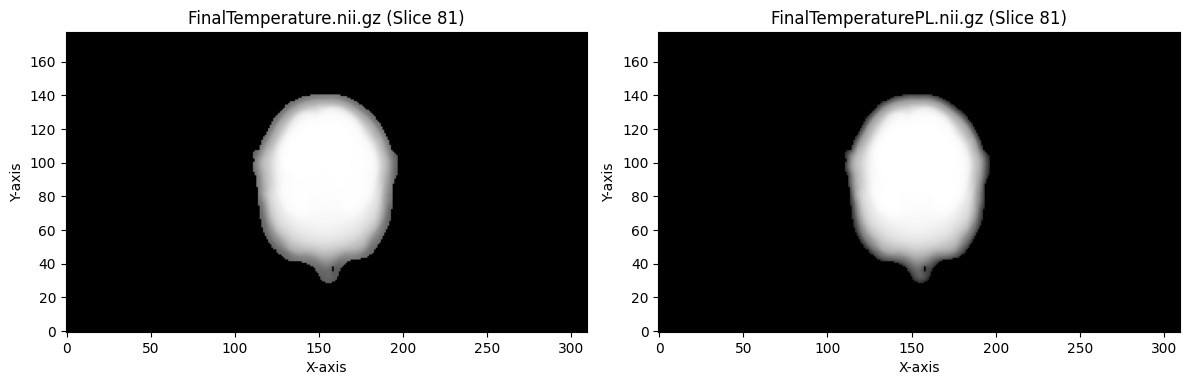

In [18]:
interactive_viewer(img1, img2)